# Plot Global Mean Thermosteric Sea Level

In [32]:
import xarray as xr
import numpy as np

In [17]:
data_dir = '../outputs/'

In [18]:
!ls {data_dir}

CMIP5_SeaLevel_rcp85_zostoga_1986-2100.nc
CMIP6_SeaLevel_ssp585_zostoga_1986-2100.nc


### Plot zostoga

In [19]:
zostoga_CMIP5  = xr.open_dataset(data_dir+'CMIP5_SeaLevel_rcp85_zostoga_1986-2100.nc')

In [20]:
zostoga_CMIP5

<xarray.Dataset>
Dimensions:            (experiment: 2, model: 24, time: 114)
Coordinates:
  * experiment         (experiment) object 'rcp85' 'piControl'
  * model              (model) object 'bcc-csm1-1' ... 'MPI-ESM-MR'
  * time               (time) float64 1.986e+03 1.988e+03 ... 2.098e+03 2.1e+03
Data variables:
    zostoga_detrended  (experiment, model, time) float64 ...
Attributes:
    source_file:    This NetCDF file was built from ComputeGlobalMeanThermalE...
    creation_date:  2020-06-10 15:34

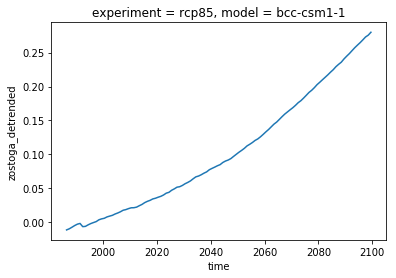

In [30]:
zostoga_CMIP5.zostoga_detrended.sel(experiment='rcp85', model='bcc-csm1-1').plot()

In [29]:
zostoga_CMIP5.zostoga_detrended.sel(experiment='rcp85', model='bcc-csm1-1')

<xarray.DataArray 'zostoga_detrended' (time: 114)>
array([-0.011191, -0.009544, -0.007234, -0.00478 , -0.002739, -0.001673,
       -0.006381, -0.00597 , -0.003715, -0.001826, -0.000343,  0.001062,
        0.003702,  0.005082,  0.005933,  0.00794 ,  0.009159,  0.010284,
        0.012236,  0.013749,  0.01555 ,  0.017799,  0.018715,  0.020199,
        0.021396,  0.021512,  0.022382,  0.024462,  0.026354,  0.028987,
        0.030888,  0.032349,  0.034439,  0.035453,  0.036983,  0.038297,
        0.040257,  0.042942,  0.044174,  0.047197,  0.049283,  0.051761,
        0.052445,  0.054334,  0.056842,  0.058766,  0.061012,  0.06415 ,
        0.066974,  0.068167,  0.070087,  0.072382,  0.074284,  0.077456,
        0.07943 ,  0.081285,  0.083301,  0.084947,  0.088109,  0.090271,
        0.091729,  0.09388 ,  0.09708 ,  0.100166,  0.103237,  0.105966,
        0.108953,  0.112555,  0.114935,  0.117571,  0.120652,  0.122847,
        0.125989,  0.129535,  0.133256,  0.136728,  0.140692,  0.144626,


### Tests

In [34]:
years_s = np.arange(2006,2100)
years_s

array([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027,
       2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038,
       2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049,
       2050, 2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058, 2059, 2060,
       2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069, 2070, 2071,
       2072, 2073, 2074, 2075, 2076, 2077, 2078, 2079, 2080, 2081, 2082,
       2083, 2084, 2085, 2086, 2087, 2088, 2089, 2090, 2091, 2092, 2093,
       2094, 2095, 2096, 2097, 2098, 2099])

In [92]:
#Test masking
DIRgrid = '/Users/dewilebars/Projects/Project_ProbSLR/Data_Proj/Data_AR5/Fingerprints/'
rg = xr.open_dataset(DIRgrid+'Relative_icesheets.nc', decode_cf=False)

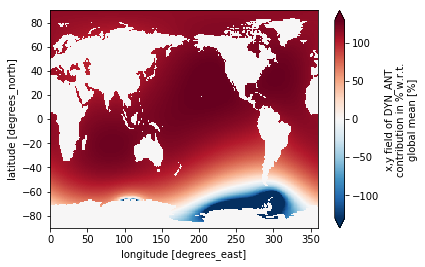

In [97]:
MaskOut     = rg.DYN_ANT
MaskOut.plot(robust=True)

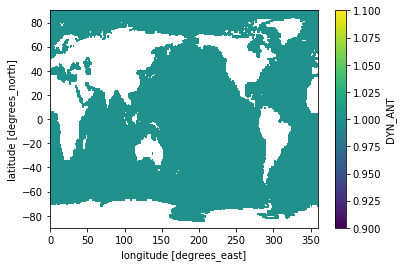

In [84]:
MaskOut = MaskOut.where(MaskOut == 0, 1)
MaskOut = MaskOut.where(MaskOut != 0)
#MaskOut = 1
#MaskOut = MaskOut.where(MaskOut == np.nan, 1)
MaskOut.plot()

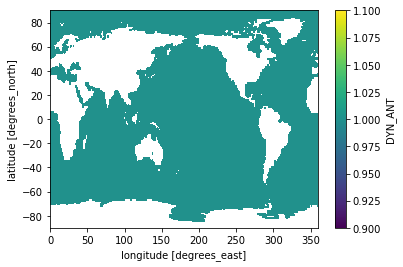

In [86]:
MaskOut.loc[dict(latitude=slice(35,51), longitude=slice(45,56))] = np.nan
MaskOut.plot()

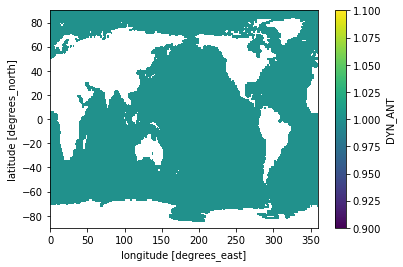

In [87]:
MaskOut_Med = MaskOut
MaskOut_Med.loc[dict(latitude=slice(20.5,41.5), longitude=slice(354,360))] = np.nan
MaskOut_Med.loc[dict(latitude=slice(20.5,41.5), longitude=slice(0,44))] = np.nan
MaskOut_Med.loc[dict(latitude=slice(41,47.5), longitude=slice(2,44))] = np.nan
MaskOut_Med.plot()

In [95]:
rg['DYN_ANT'].encoding

{'source': '/Users/dewilebars/Projects/Project_ProbSLR/Data_Proj/Data_AR5/Fingerprints/Relative_icesheets.nc',
 'original_shape': (180, 360),
 'dtype': dtype('float32')}

In [ ]:
MaskOut     = rg.DYN_ANT /100
MaskOut.plot()

In [91]:
rg.DYN_ANT.encoding

{'source': '/Users/dewilebars/Projects/Project_ProbSLR/Data_Proj/Data_AR5/Fingerprints/Relative_icesheets.nc',
 'original_shape': (180, 360),
 'dtype': dtype('float32')}